# Final Verification: Side-by-Side Maps of Yield and Temperature

**Goal:** To visually inspect our final, cleaned dataset by plotting the maize yield and the corresponding growing season temperature for our Northern Italy region for every year from 1981 to 2016.

Loaded the final dataset with 1529 rows.

--- Verifying number of grid cells per year ---
year
1981     1
1982    44
1983    44
1984    44
1985    44
1986    44
1987    44
1988    44
1989    44
1990    44
1991    44
1992    44
1993    44
1994    44
1995    44
1996    44
1997    44
1998    44
1999    44
2000    44
2001    44
2002    44
2003    44
2004    44
2005    44
2006    44
2007    44
2008    44
2009    44
2010    44
2011    42
2012    42
2013    42
2014    42
2015    42
2016    42

Removed 1981 data. The dataset now has 1528 rows.

--- Generating maps for 1982 ---


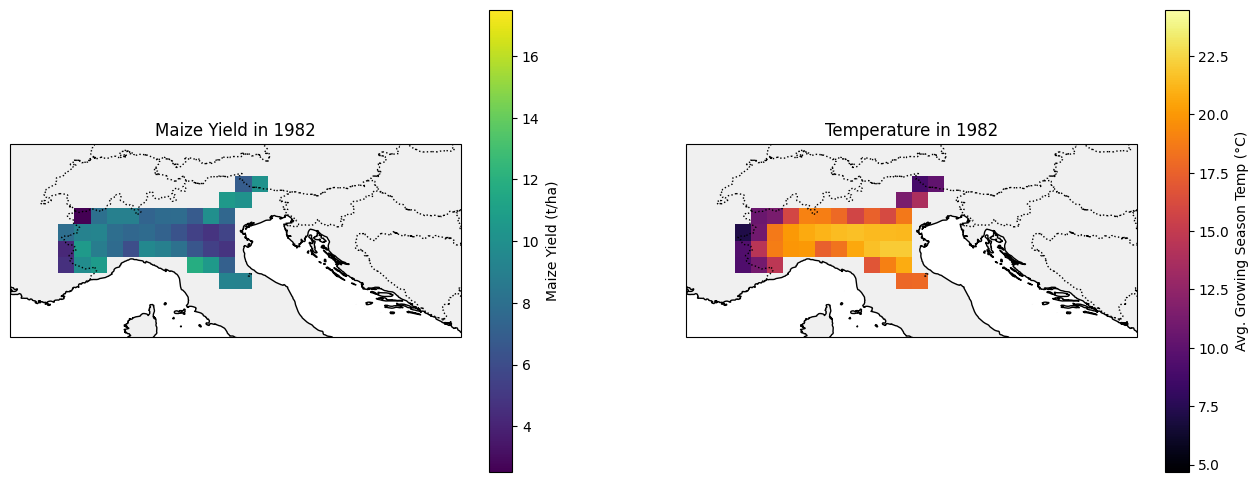


--- Generating maps for 1983 ---


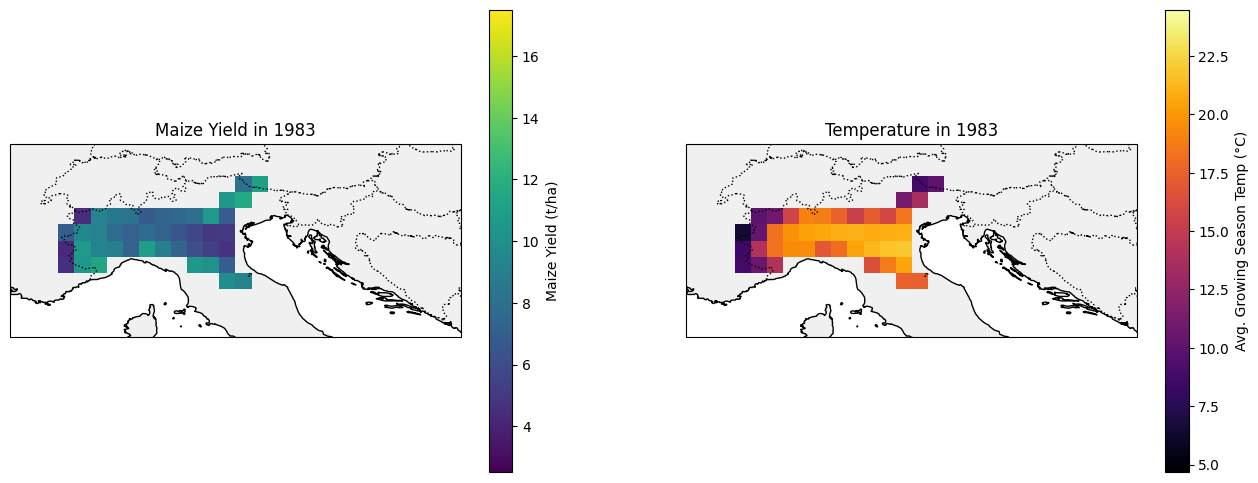


--- Generating maps for 1984 ---


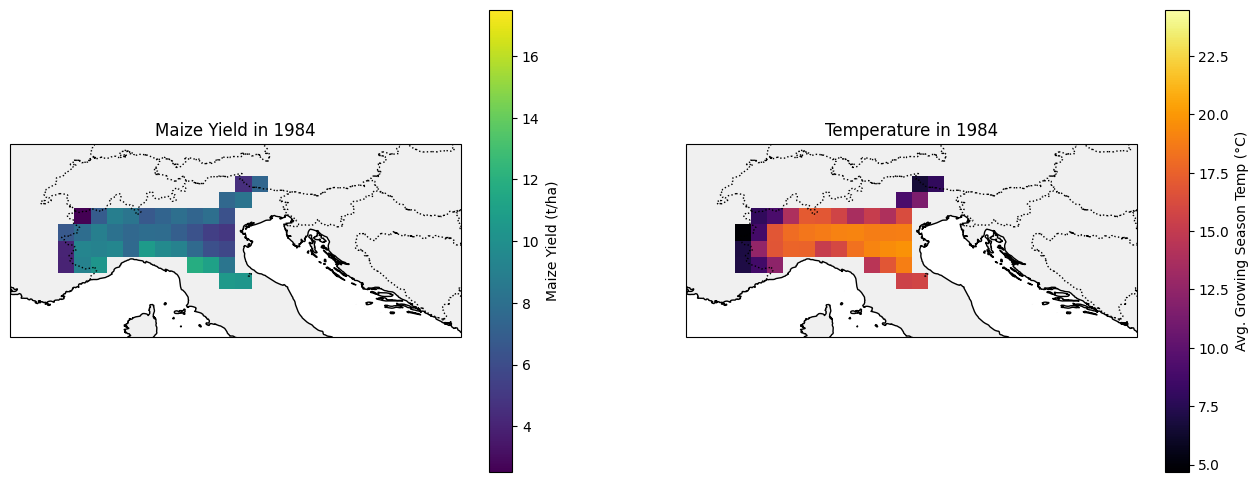


--- Generating maps for 1985 ---


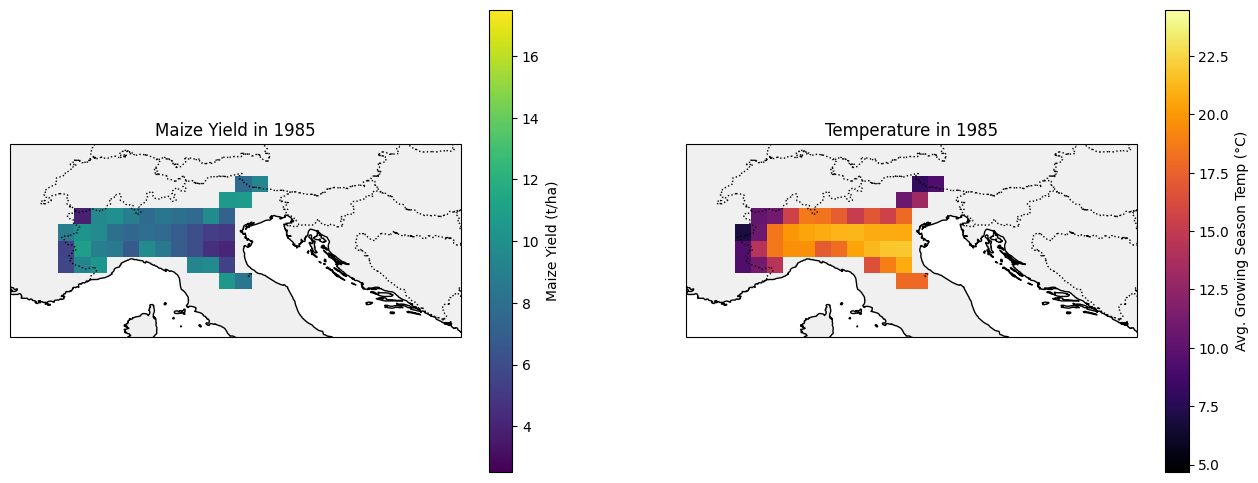


--- Generating maps for 1986 ---


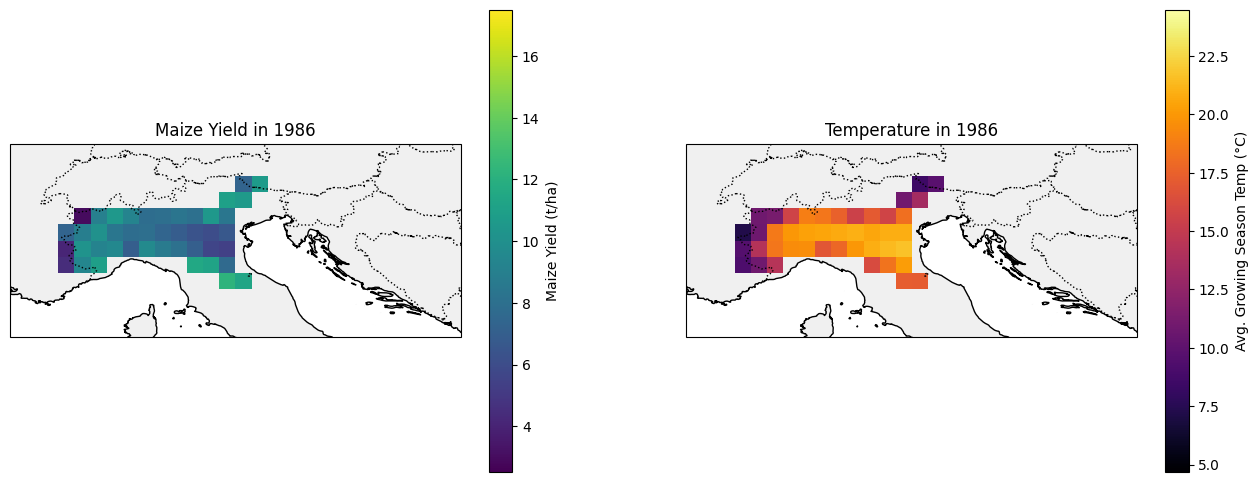


--- Generating maps for 1987 ---


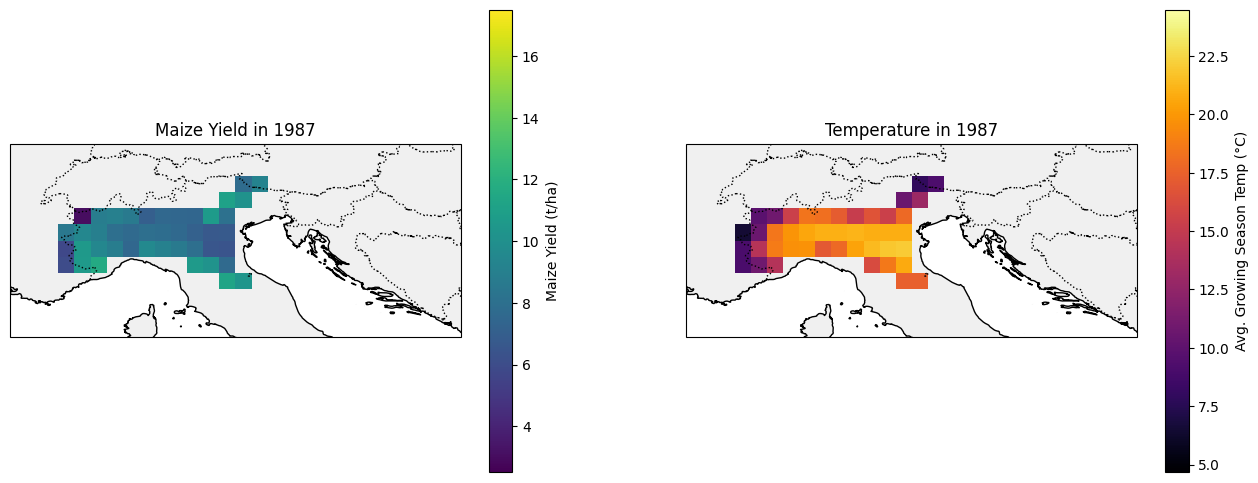


--- Generating maps for 1988 ---


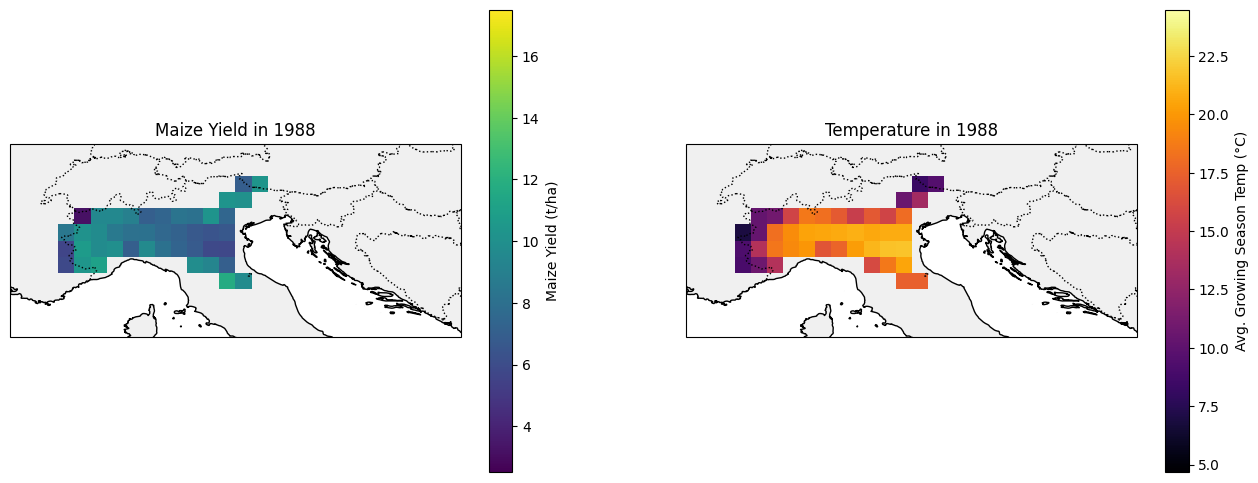


--- Generating maps for 1989 ---


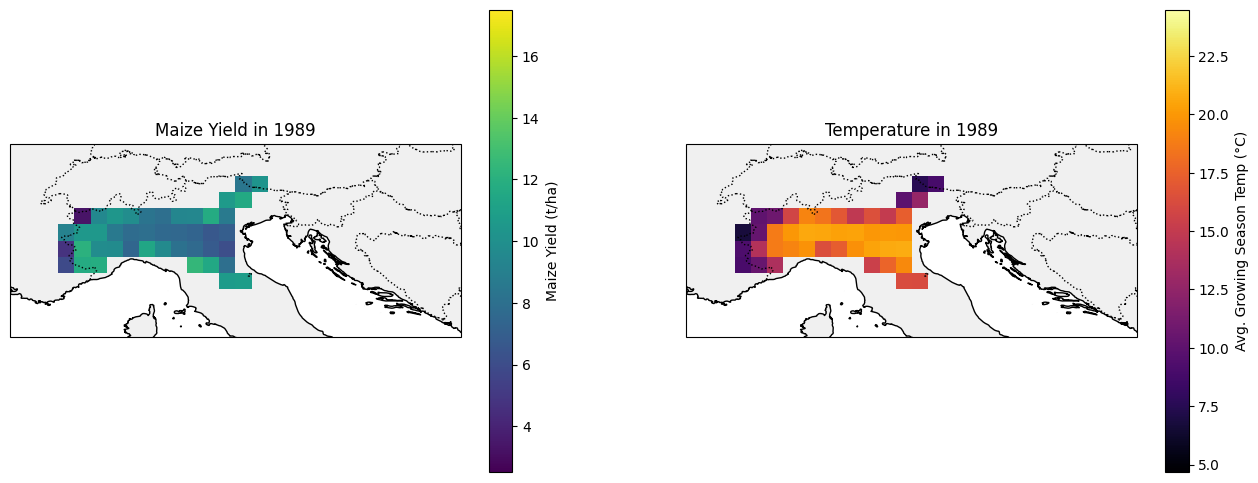


--- Generating maps for 1990 ---


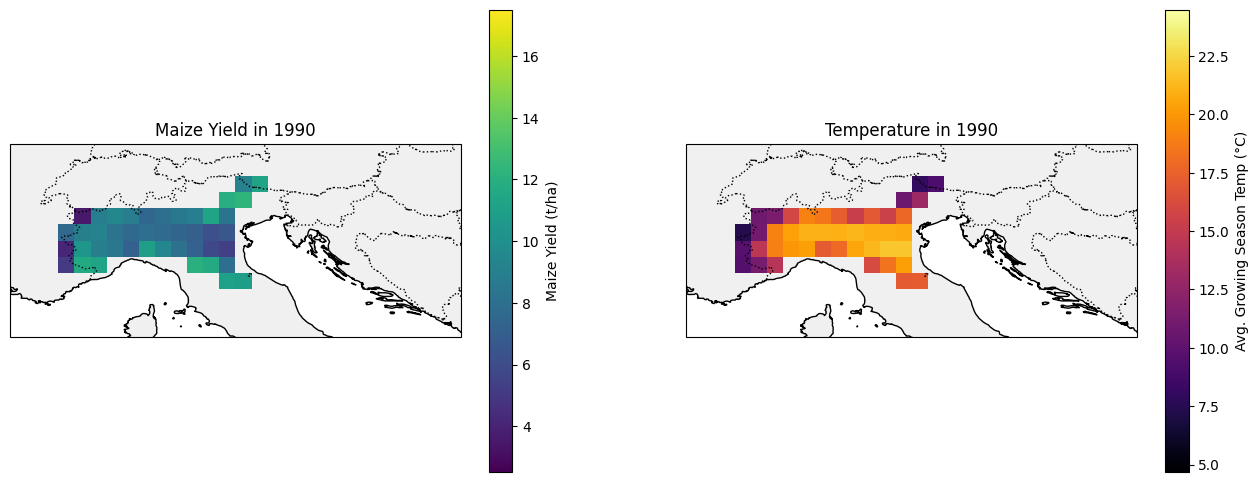


--- Generating maps for 1991 ---


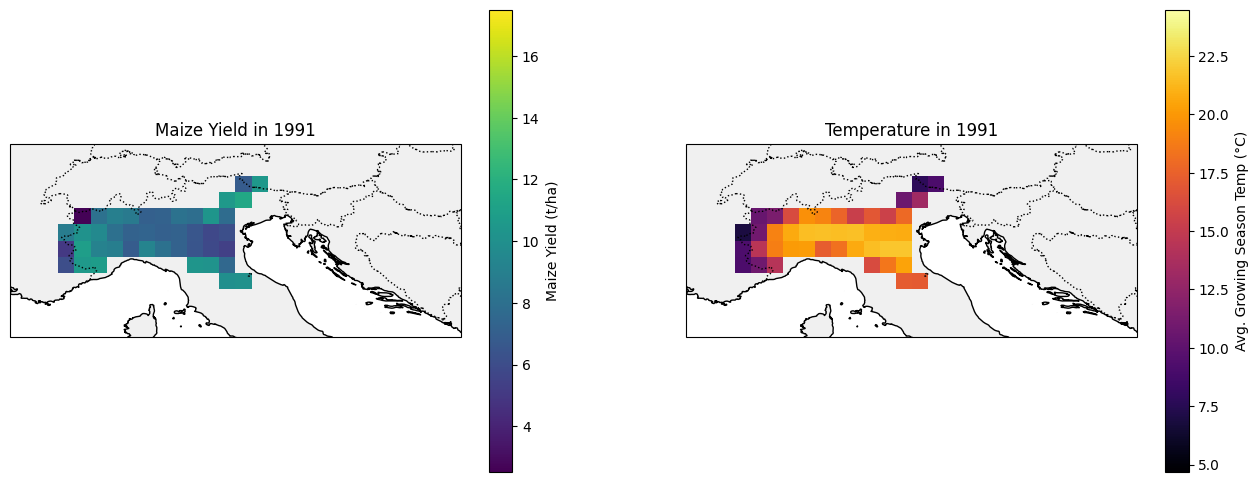


--- Generating maps for 1992 ---


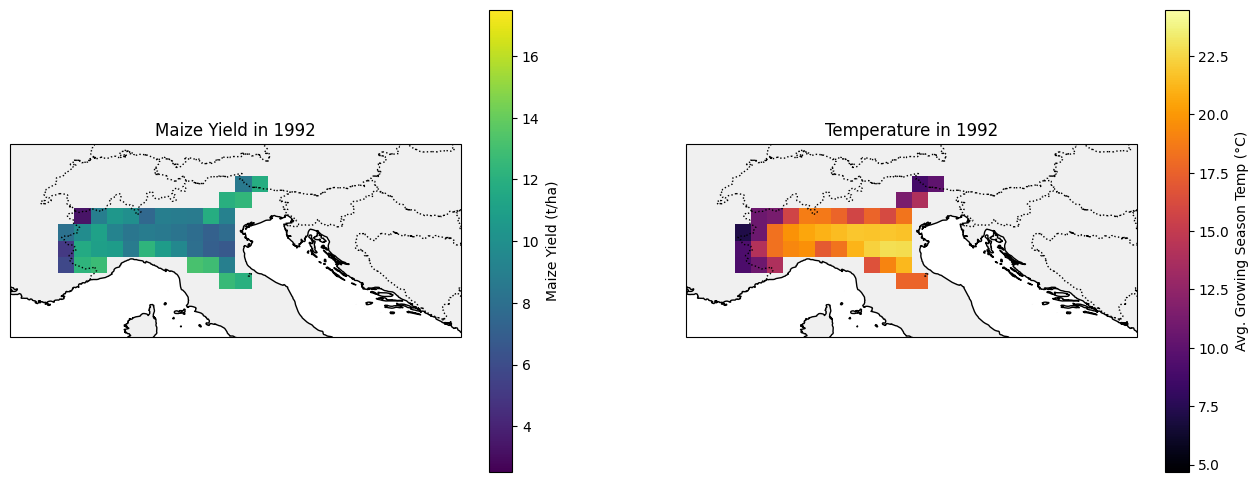


--- Generating maps for 1993 ---


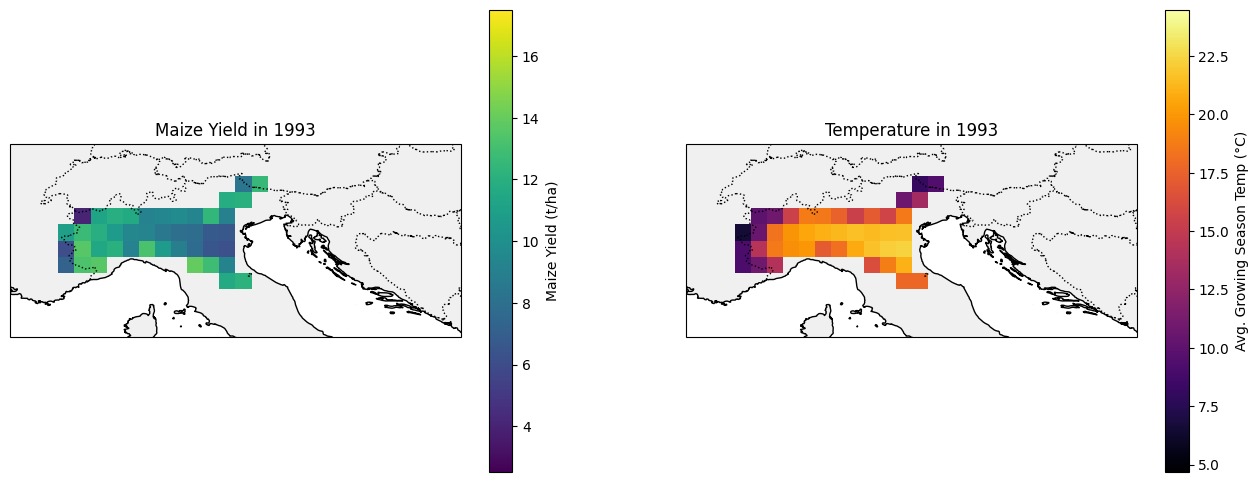


--- Generating maps for 1994 ---


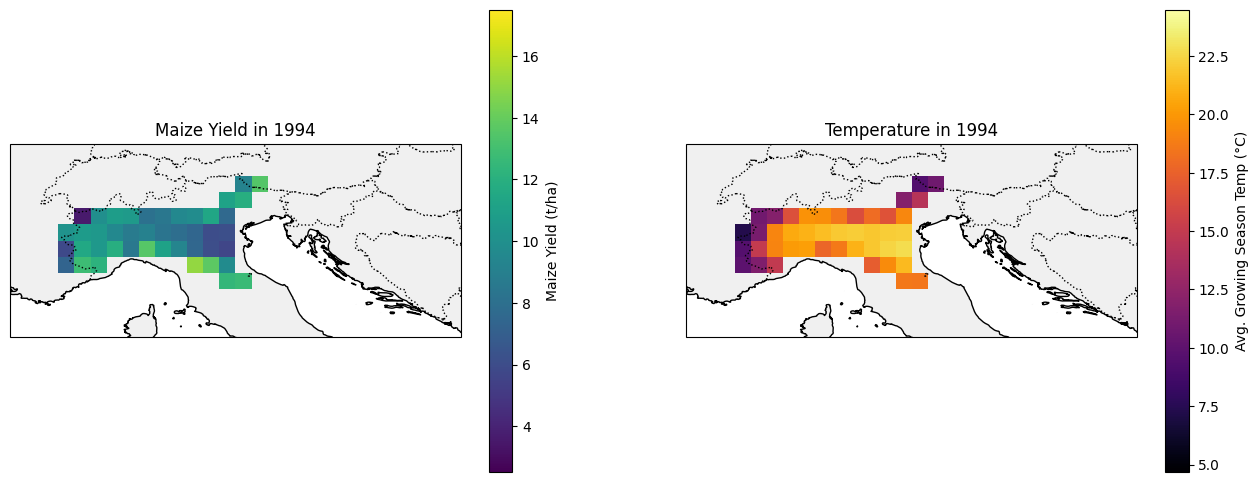


--- Generating maps for 1995 ---


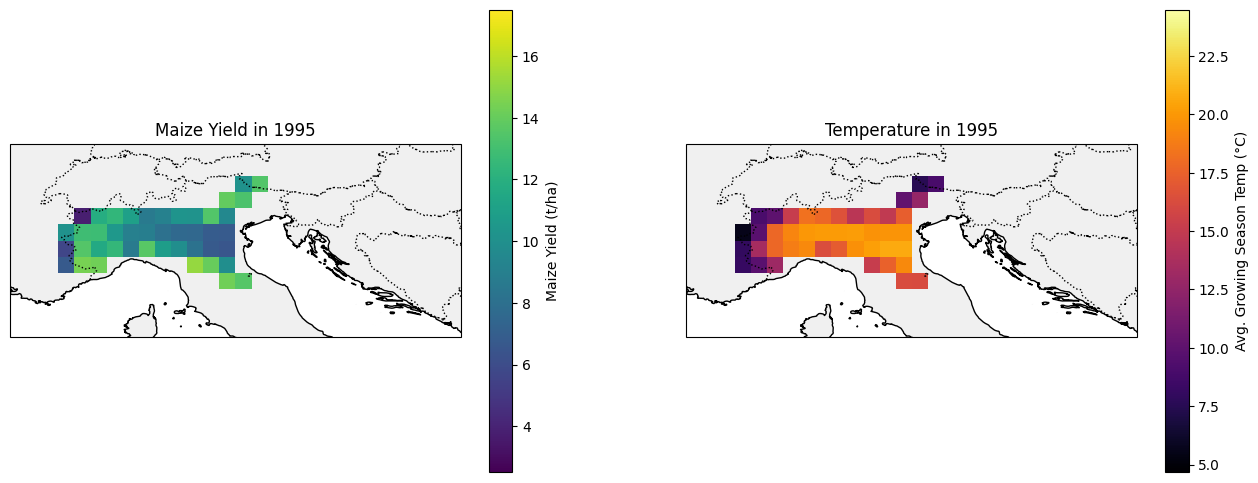


--- Generating maps for 1996 ---


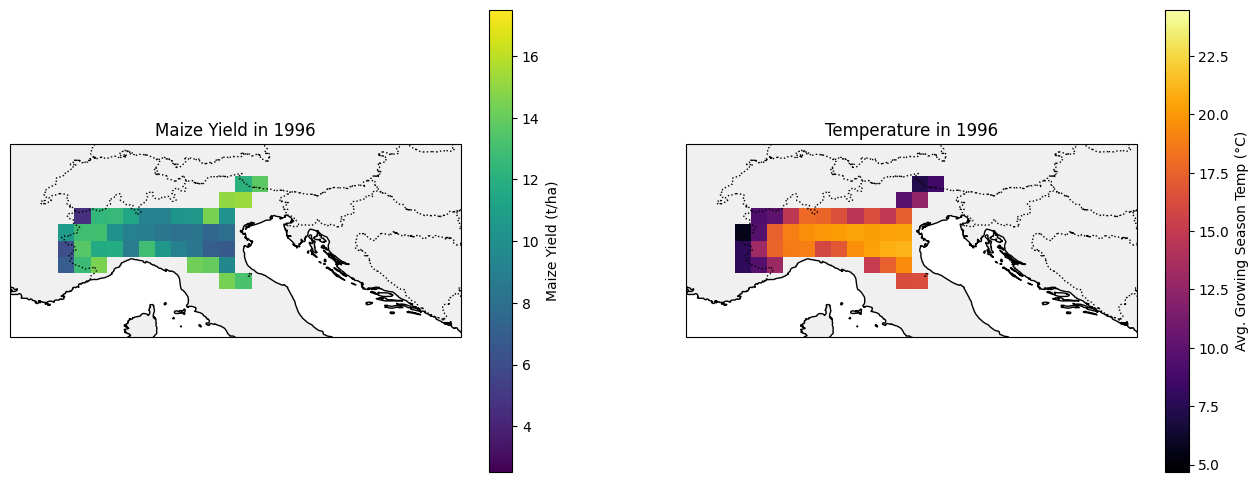


--- Generating maps for 1997 ---


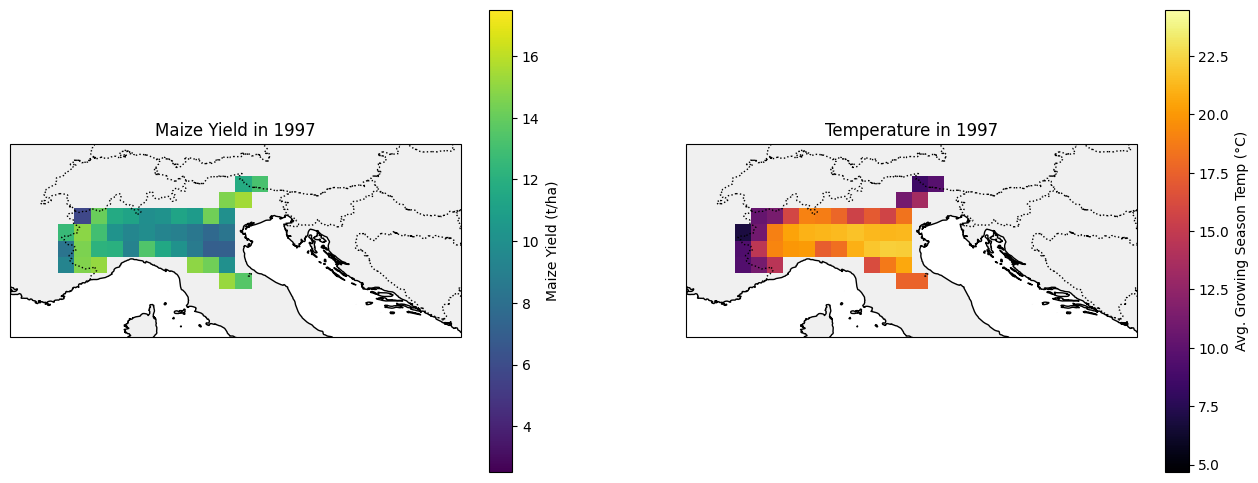


--- Generating maps for 1998 ---


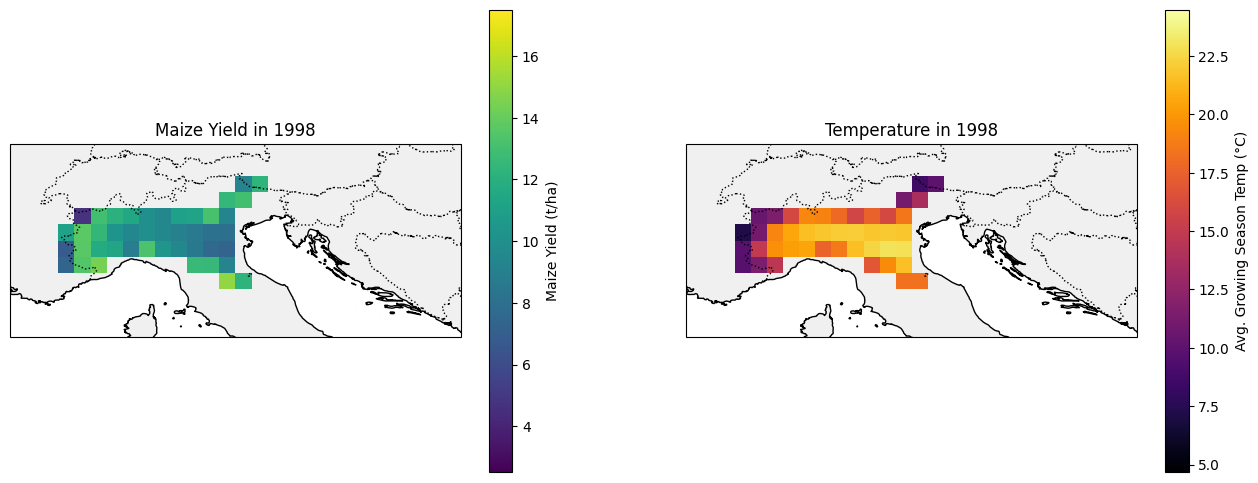


--- Generating maps for 1999 ---


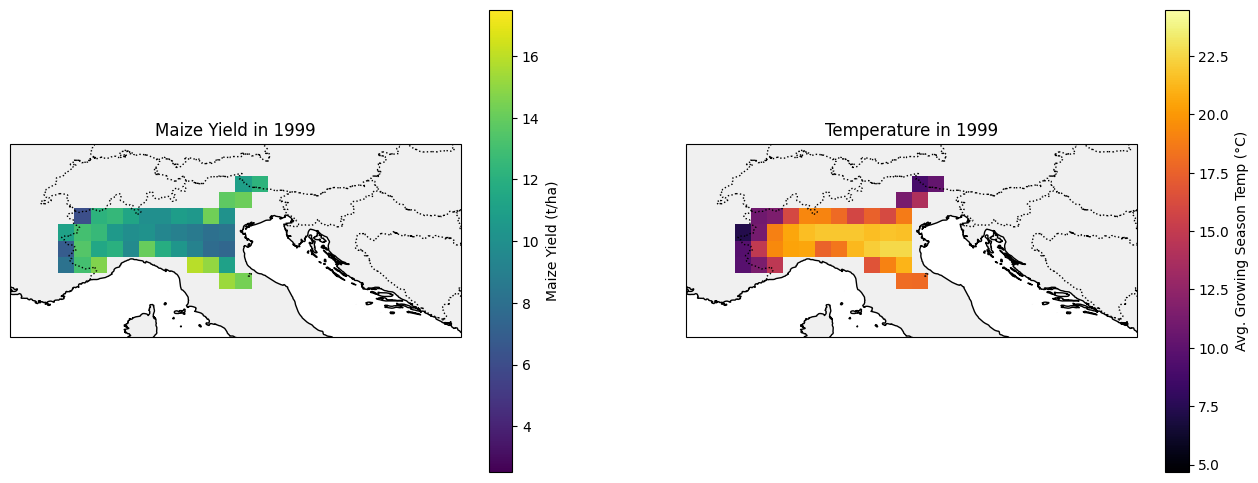


--- Generating maps for 2000 ---


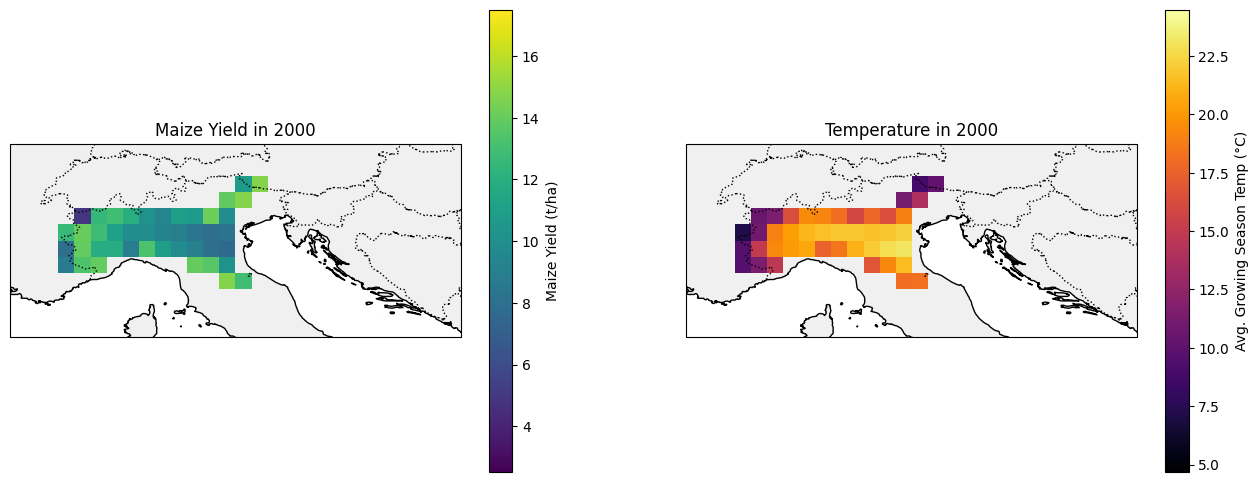


--- Generating maps for 2001 ---


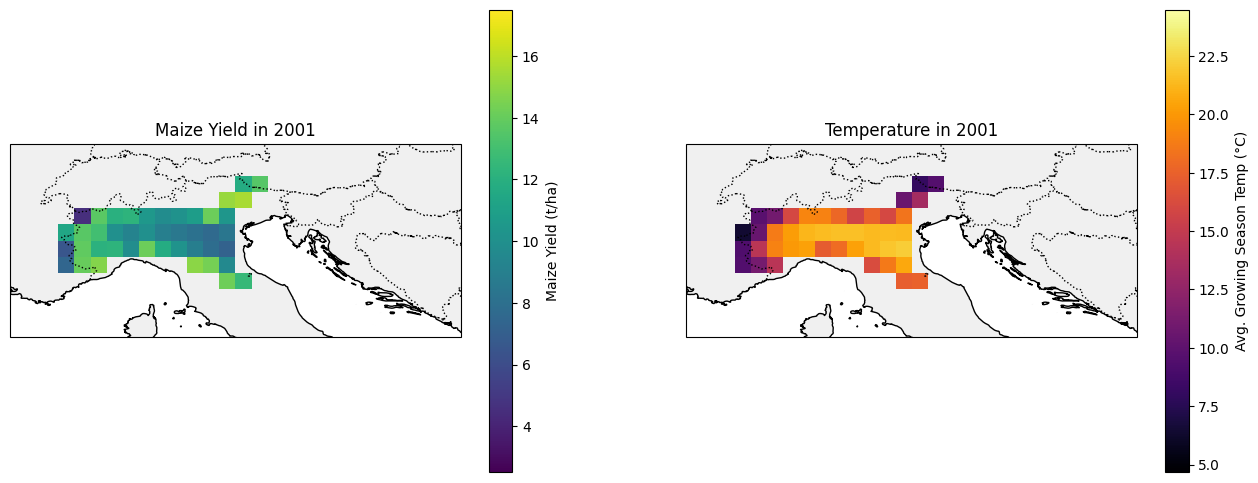


--- Generating maps for 2002 ---


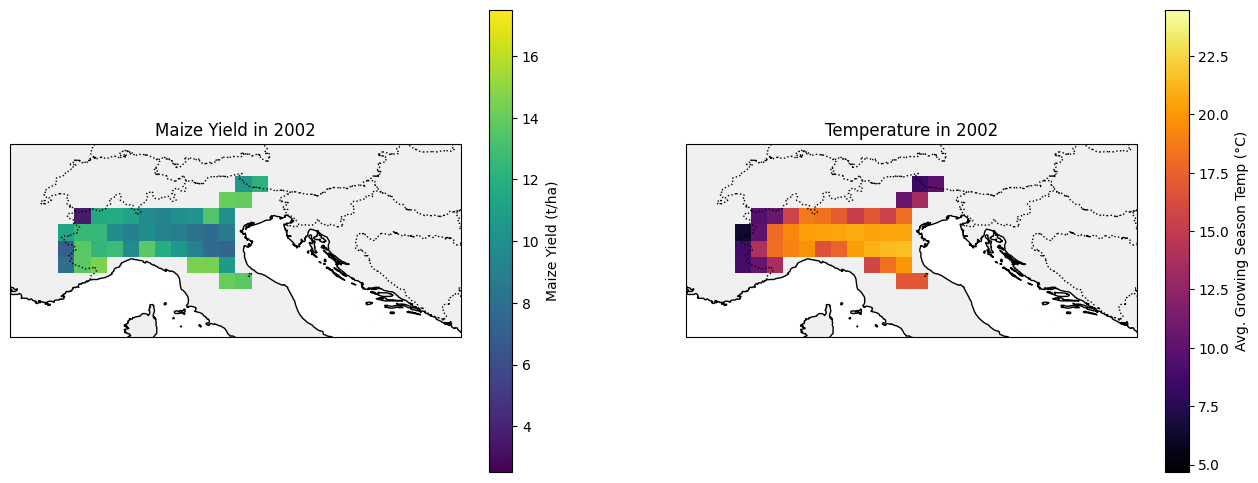


--- Generating maps for 2003 ---


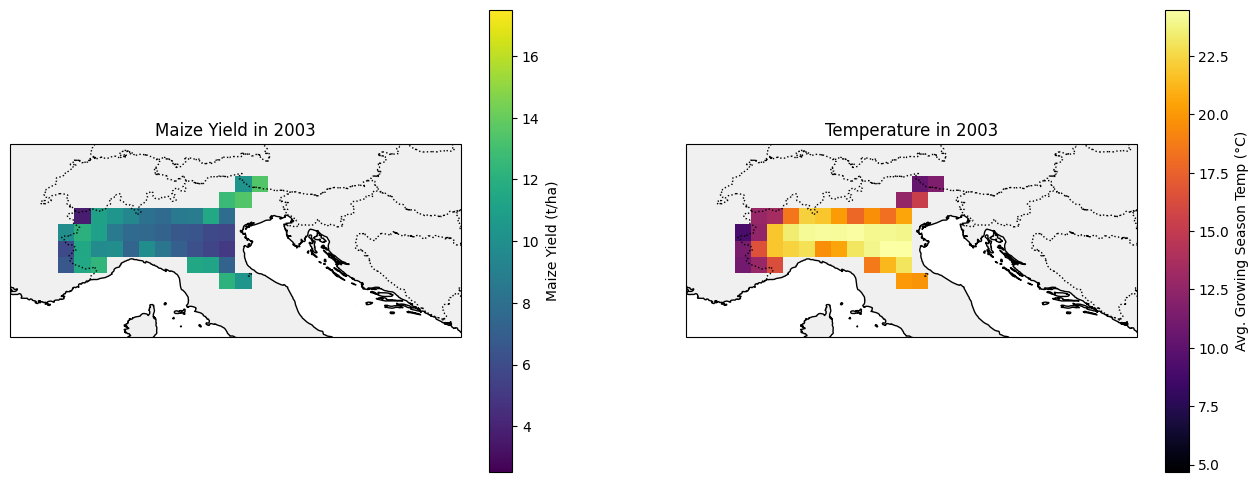


--- Generating maps for 2004 ---


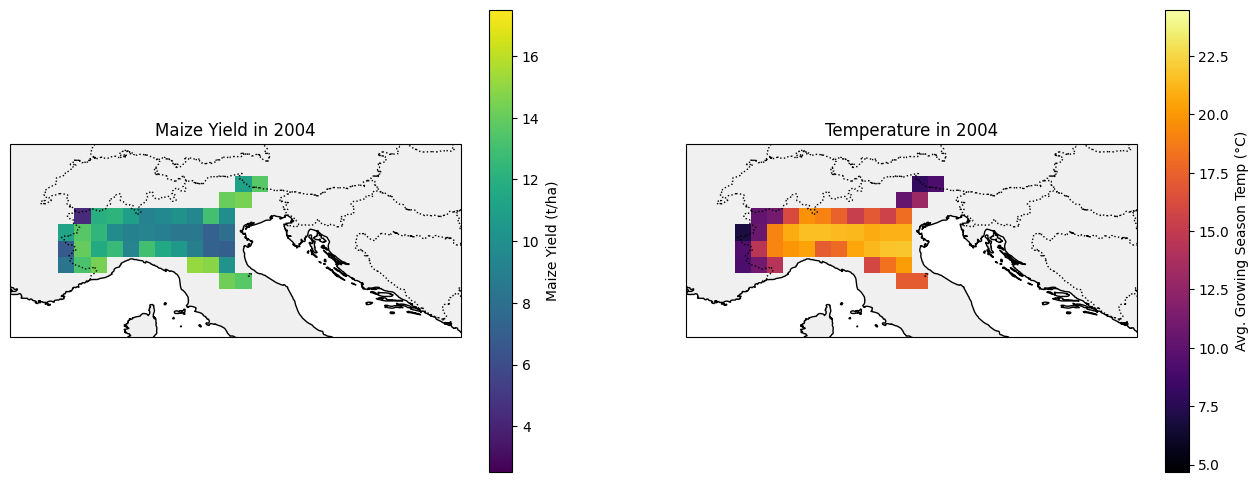


--- Generating maps for 2005 ---


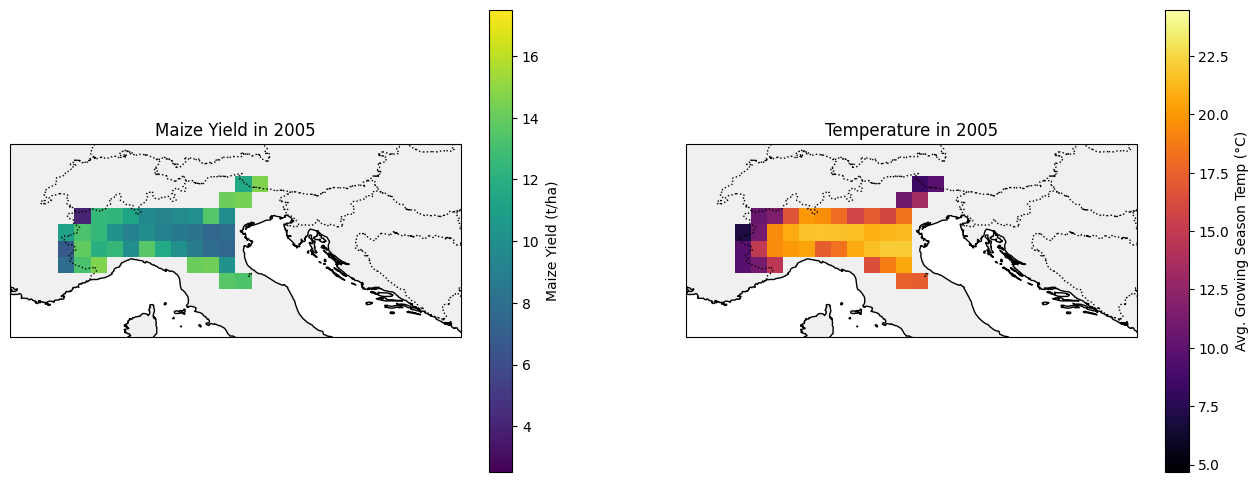


--- Generating maps for 2006 ---


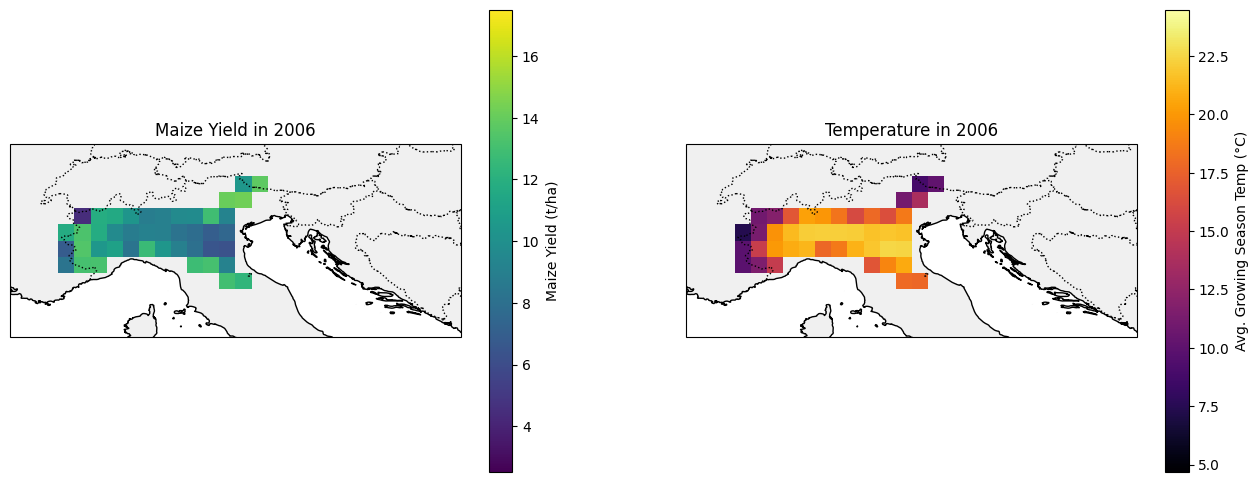


--- Generating maps for 2007 ---


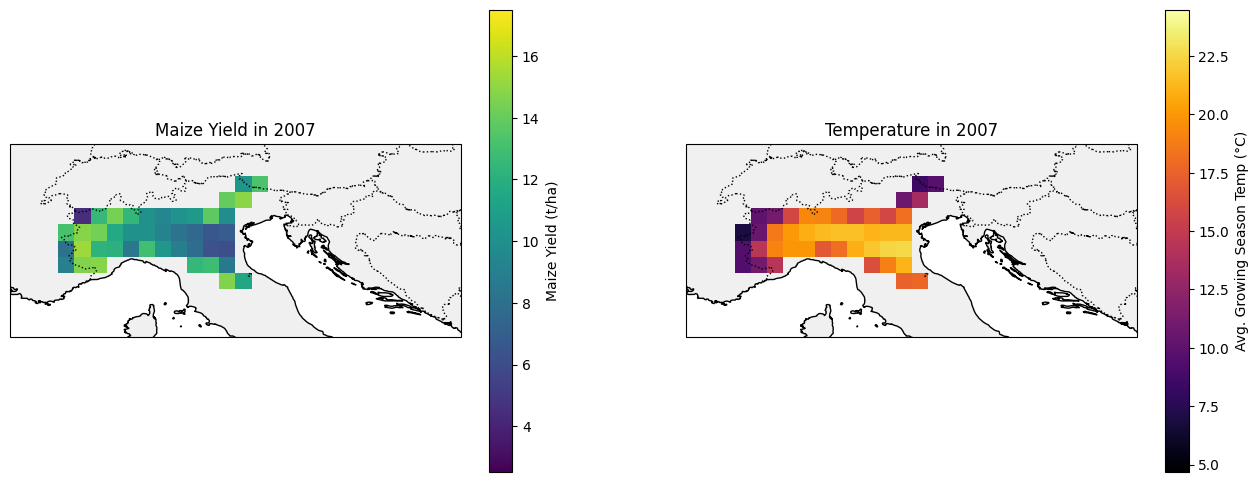


--- Generating maps for 2008 ---


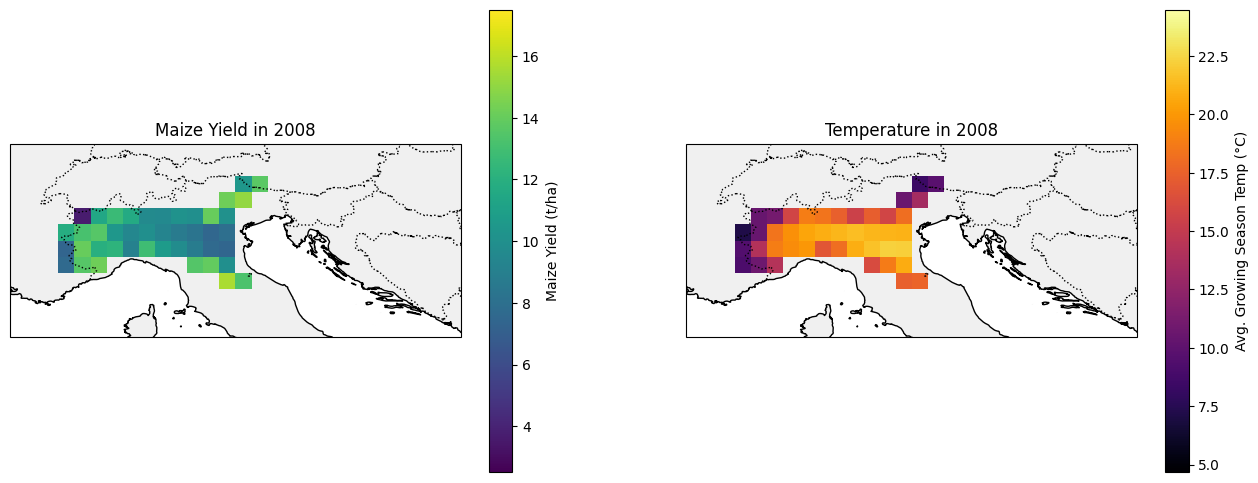


--- Generating maps for 2009 ---


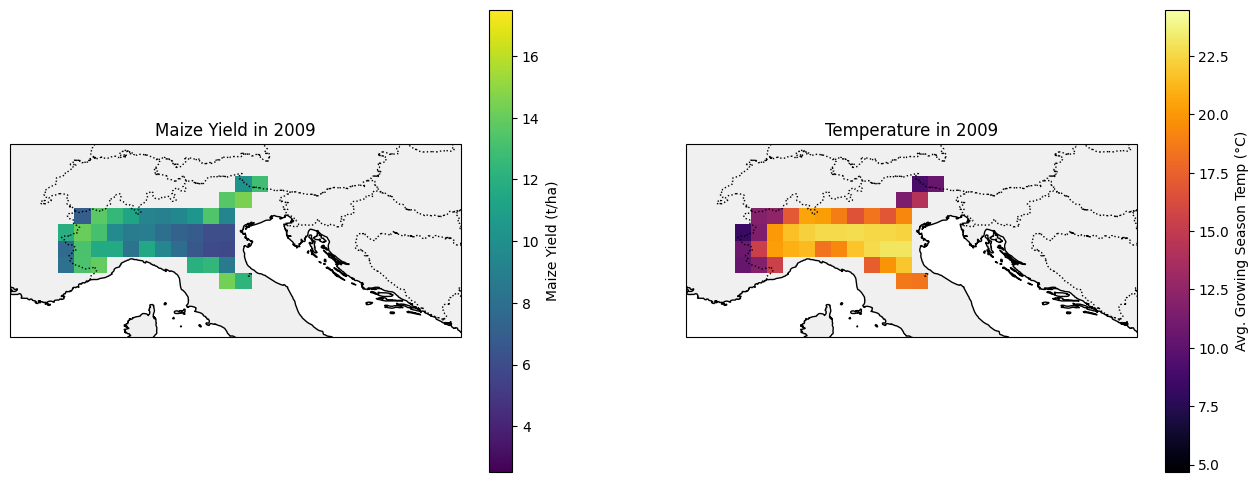


--- Generating maps for 2010 ---


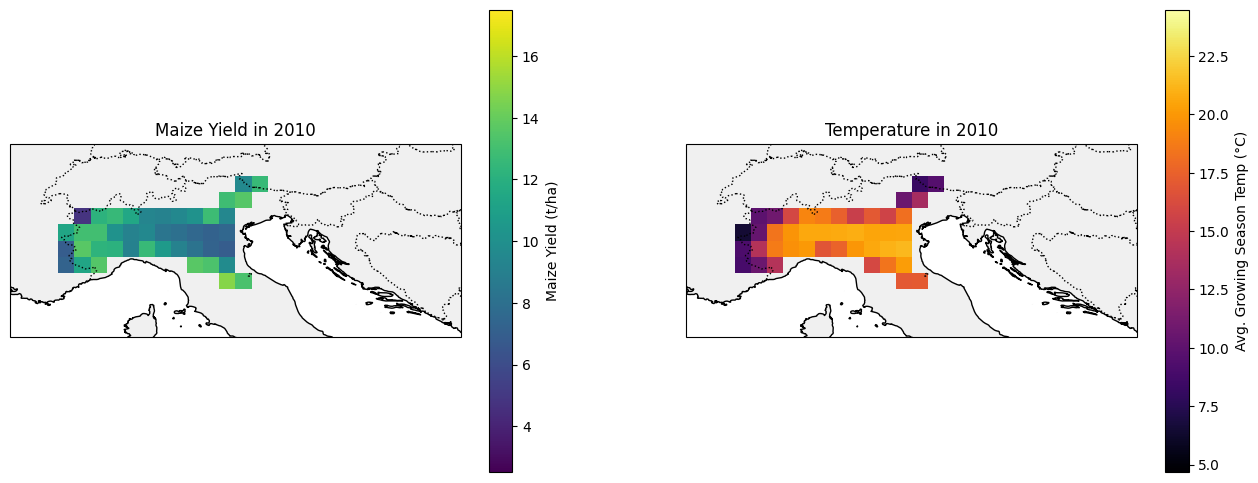


--- Generating maps for 2011 ---


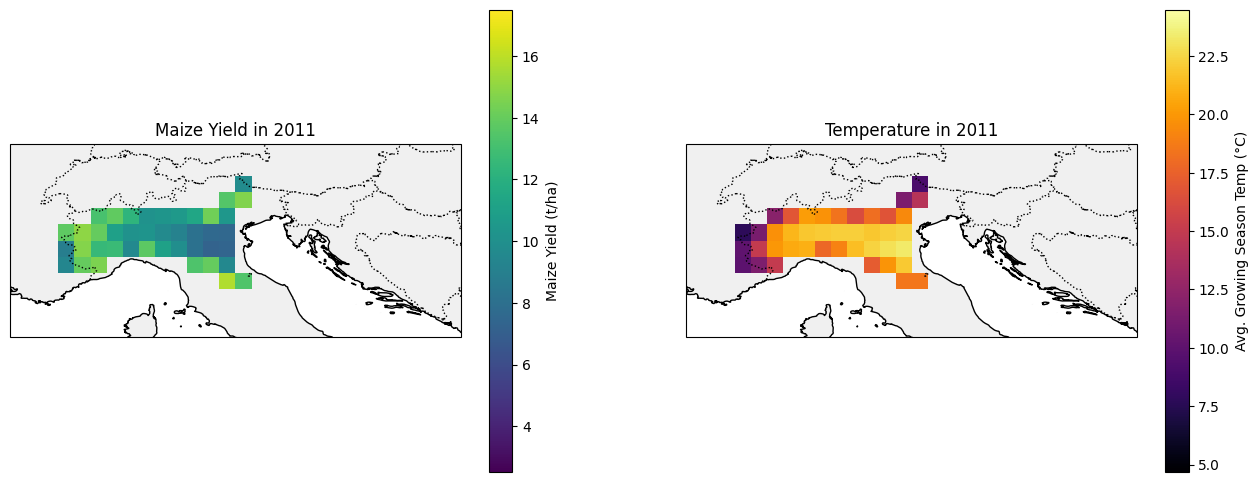


--- Generating maps for 2012 ---


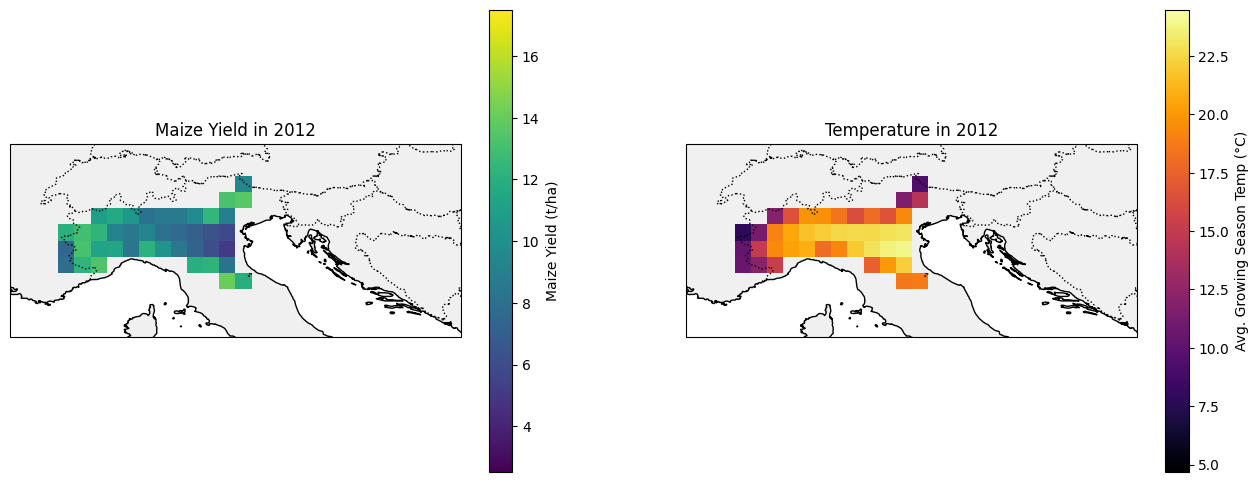


--- Generating maps for 2013 ---


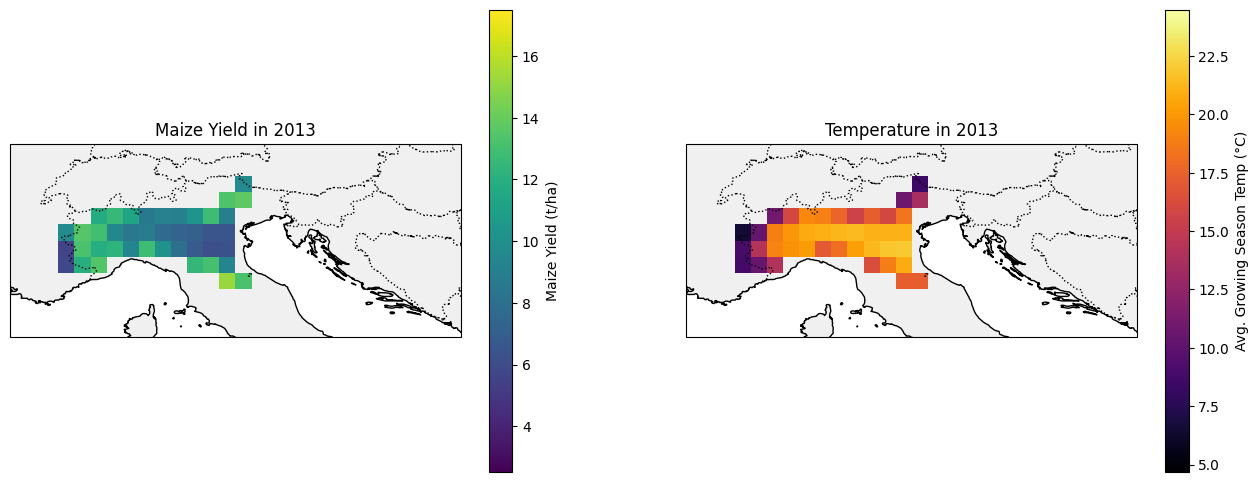


--- Generating maps for 2014 ---


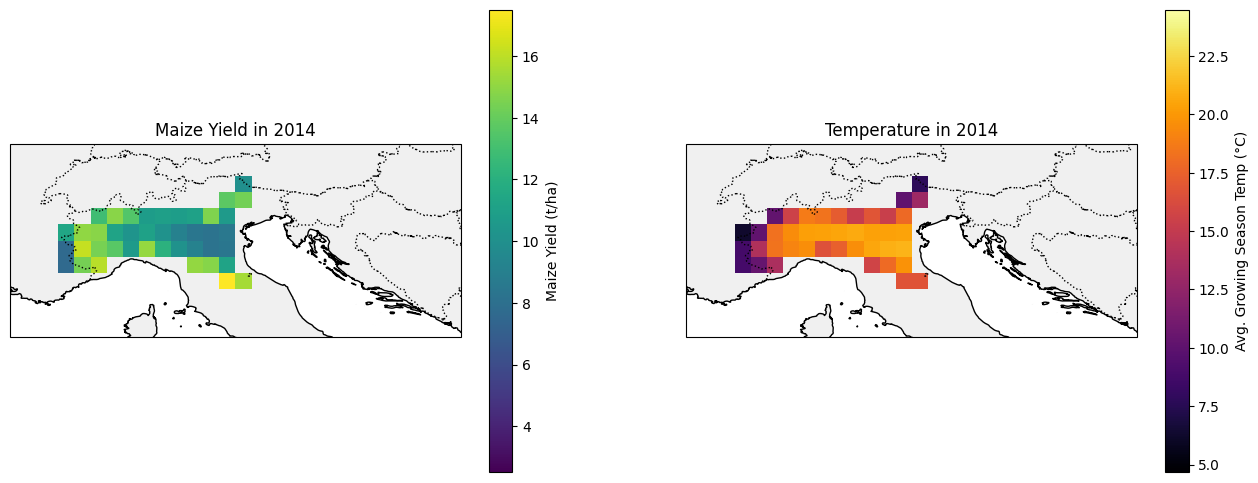


--- Generating maps for 2015 ---


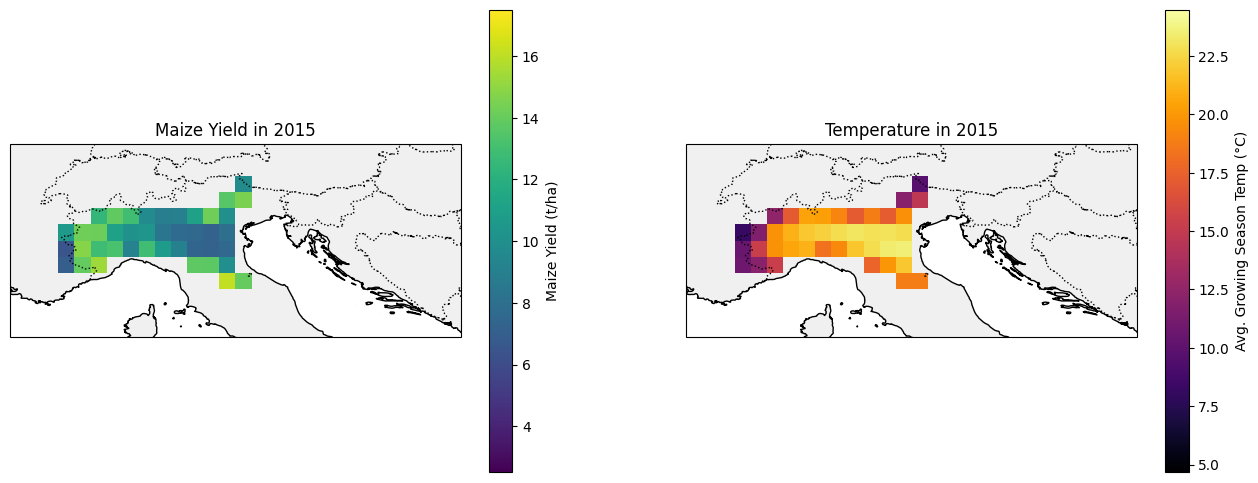


--- Generating maps for 2016 ---


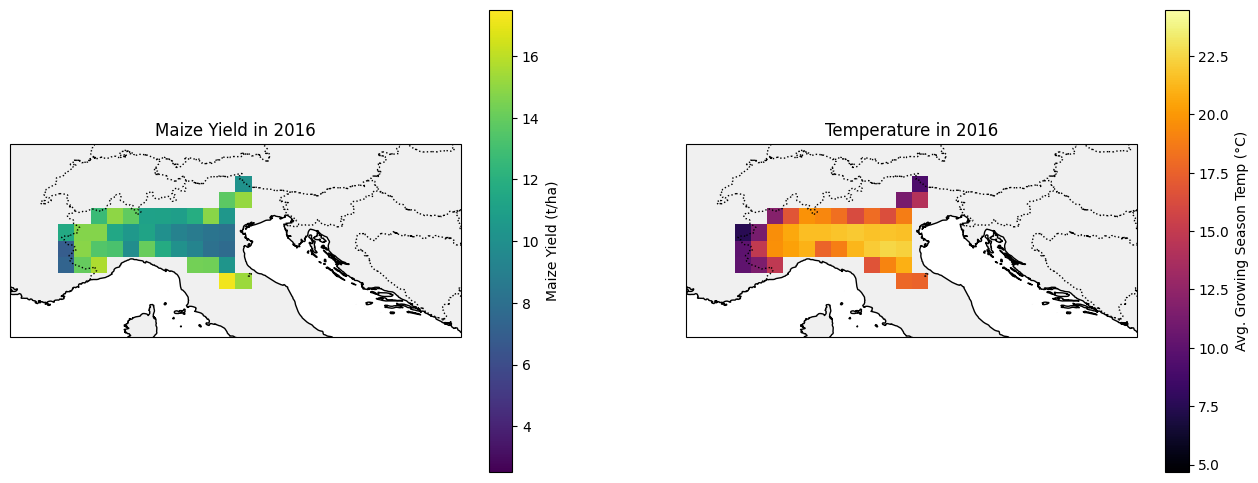


--- All verification maps generated. ---


In [2]:
# Final Verification (Corrected): Side-by-Side Maps of Yield and Temperature
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# --- 1. Load our final, clean dataset ---
file_path = '../data/analysis_ready/n_italy_maize_gridcell_temp_data.csv'
final_df = pd.read_csv(file_path)
print(f"Loaded the final dataset with {len(final_df)} rows.")

# --- 2. VERIFICATION 1: Count rows per year (as you suggested) ---
print("\n--- Verifying number of grid cells per year ---")
rows_per_year = final_df.groupby('year').size()
print(rows_per_year.to_string())

# --- 3. Clean the Data (as you suggested) ---
# Exclude 1981 because it has very sparse data
df_cleaned = final_df[final_df['year'] != 1981].copy()
print(f"\nRemoved 1981 data. The dataset now has {len(df_cleaned)} rows.")

# --- 4. Convert the clean DataFrame back into a gridded xarray Dataset ---
# This is the correct way to reconstruct the data cubes for plotting.
ds_final = df_cleaned.set_index(['year', 'lat', 'lon']).to_xarray()

# --- 5. Determine consistent color scales for plotting ---
yield_vmin = ds_final['maize_yield'].min().item()
yield_vmax = ds_final['maize_yield'].max().item()
temp_vmin = ds_final['temperature'].min().item()
temp_vmax = ds_final['temperature'].max().item()

# --- 6. Loop through each year and create a pair of maps ---
# We loop through the unique years present in our cleaned dataset
for year in ds_final.year.values:
    print(f"\n--- Generating maps for {year} ---")
    
    data_for_year = ds_final.sel(year=year)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # --- Plot 1: Maize Yield ---
    ax1.set_extent([5, 19, 42, 48], crs=ccrs.PlateCarree())
    ax1.add_feature(cfeature.LAND, facecolor='#f0f0f0')
    ax1.coastlines()
    ax1.add_feature(cfeature.BORDERS, linestyle=':')
    data_for_year['maize_yield'].plot(
        ax=ax1, transform=ccrs.PlateCarree(), cmap='viridis',
        vmin=yield_vmin, vmax=yield_vmax,
        cbar_kwargs={'label': 'Maize Yield (t/ha)'}
    )
    ax1.set_title(f'Maize Yield in {year}')

    # --- Plot 2: Temperature ---
    ax2.set_extent([5, 19, 42, 48], crs=ccrs.PlateCarree())
    ax2.add_feature(cfeature.LAND, facecolor='#f0f0f0')
    ax2.coastlines()
    ax2.add_feature(cfeature.BORDERS, linestyle=':')
    data_for_year['temperature'].plot(
        ax=ax2, transform=ccrs.PlateCarree(), cmap='inferno',
        vmin=temp_vmin, vmax=temp_vmax,
        cbar_kwargs={'label': 'Avg. Growing Season Temp (°C)'}
    )
    ax2.set_title(f'Temperature in {year}')
    
    plt.show()

print("\n--- All verification maps generated. ---")